<a href="https://colab.research.google.com/github/rajatgermany/data/blob/master/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from google.colab import drive 
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd 
df=pd.read_csv('gdrive/My Drive/Colab Notebooks/dataexploration/titanic/train.csv')

In [0]:
% matplotlib inline
import matplotlib.pyplot as plt


In [0]:
#@title Default title text



NameError: ignored

In [0]:
null_percentage = (null_values / df.shape[0]) * 100

In [0]:
df_null_values = 0

In [0]:
MMdf_null_values = pd.concat([null_values, null_percentage], axis = 1)

In [0]:
df_null_values

,0,1
Age,177,0.000000
Cabin,687,77.104377
Embarked,2,0.224467
Fare,0,0.000000
Name,0,0.000000
Parch,0,0.000000
PassengerId,0,0.000000
Pclass,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000


In [0]:
# checking the null_values 

In [0]:
df[df.Age.isnull()].groupby('Survived').count()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,,,,,,,,,,,
0,125,125,125,125,0,125,125,125,125,8,125
1,52,52,52,52,0,52,52,52,52,11,52


In [0]:
df.groupby('Survived')['Age'].mean()

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

In [0]:
df.loc[
(df.Age.isnull()) & (df.Survived == 0), 'Age'] = 30.62


In [0]:
df.loc[(df.Age.isnull()) & (df.Survived == 1), 'Age'] = 28.343690


In [0]:
df.groupby('Pclass').Embarked.count()

Pclass
1    214
2    184
3    491
Name: Embarked, dtype: int64

In [0]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

S    127
C     85
Q      2
Name: Embarked, dtype: int64

In [0]:
df.loc[df.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,28.34369,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,28.34369,0,0,113572,80.0,B28,NaN


In [0]:
df[df.Pclass == 1]['Embarked'].value_counts()

S    127
C     85
Q      2
Name: Embarked, dtype: int64

In [0]:
df[df.Sex == "female"]['Embarked'].value_counts()

S    203
C     73
Q     36
Name: Embarked, dtype: int64

In [0]:
df.loc[df.Embarked.isnull(), 'Embarked'] = 'S'

In [0]:
df.Embarked.isnull().sum()

0

In [0]:
df.A

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [0]:
df.drop('Cabin', inplace = True, axis = 1)
df.drop('PassengerId', inplace = True, axis = 1)


In [0]:
df.drop('PassengerId', inplace = True, axis = 1)


In [0]:
# univariate analysis


In [0]:
df_numeric = df.select_dtypes(exclude = 'object')

In [0]:
# continous variables 

In [0]:
df_numeric.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [0]:
df.Age.describe()

count    891.000000
mean      29.749205
std       13.010624
min        0.420000
25%       22.000000
50%       30.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [0]:
df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


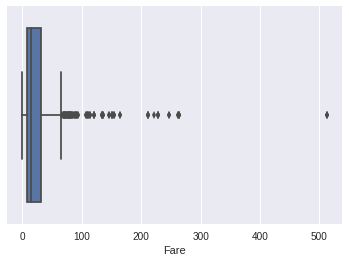

In [0]:
sns.boxplot(df.Fare)

In [0]:
df.Age.value_counts()

30.62000    839
28.34369     52
Name: Age, dtype: int64

In [0]:
df.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [0]:
# f,ax=plt.subplots(1,2,figsize=(20,10))
# data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
# ax[0].set_title('Survived= 0')
# x1=list(range(0,85,5))
# ax[0].set_xticks(x1)
# data[data['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
# ax[1].set_title('Survived= 1')
# x2=list(range(0,85,5))
# ax[1].set_xticks(x2)
# plt.show()



# kERNEL DENSITY PLOTs in the same axis

# Kernel Density Plot
# fig = plt.figure(figsize=(15,8),)
# ax=sns.kdeplot(train.loc[(train['Survived'] == 0),'Age'] , color='gray',shade=True,label='not survived')
# ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Age'] , color='g',shade=True, label='survived')
# plt.title('Age Distribution - Surviver V.S. Non Survivors', fontsize = 25)
# plt.xlabel("Age", fontsize = 15)
# plt.ylabel('Frequency', fontsize = 15);


bivariate continous variable distribution
Draw the facetgrid 
g = sns.FacetGrid(train,size=5, col="Sex", row="Embarked", margin_titles=True, hue = "Survived",
                  palette = pal
                  )
g = g.map(plt.hist, "Age", edgecolor = 'white').add_legend();
g.fig.suptitle("Survived by Sex and Age", size = 25)
plt.subplots_adjust(top=0.90)

if its a nominal variable then always draw the frequency table

DO lots of visualization before removing the outlier

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,S
5,0,3,"Moran, Mr. James",male,30.62000,0,0,330877,8.4583,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54.00000,0,0,17463,51.8625,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.00000,3,1,349909,21.0750,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00000,0,2,347742,11.1333,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00000,1,0,237736,30.0708,C
